# Regression Models in R

In [1]:
library(readr)
library(mechkar)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz")

Parsed with column specification:
cols(
  holiday = col_character(),
  temp = col_double(),
  rain_1h = col_double(),
  snow_1h = col_double(),
  clouds_all = col_double(),
  weather_main = col_character(),
  weather_description = col_character(),
  date_time = col_datetime(format = ""),
  traffic_volume = col_double()
)



In [3]:
head(df)
dim(df)

holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dttm>,<dbl>
None,288.28,0,0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
None,289.36,0,0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
None,289.58,0,0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
None,290.13,0,0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
None,291.14,0,0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
None,291.72,0,0,1,Clear,sky is clear,2012-10-02 14:00:00,5181


[1] 48204     9

# EDA

In [4]:
summary(df)

   holiday               temp          rain_1h            snow_1h         
 Length:48204       Min.   :  0.0   Min.   :   0.000   Min.   :0.0000000  
 Class :character   1st Qu.:272.2   1st Qu.:   0.000   1st Qu.:0.0000000  
 Mode  :character   Median :282.4   Median :   0.000   Median :0.0000000  
                    Mean   :281.2   Mean   :   0.334   Mean   :0.0002224  
                    3rd Qu.:291.8   3rd Qu.:   0.000   3rd Qu.:0.0000000  
                    Max.   :310.1   Max.   :9831.300   Max.   :0.5100000  
   clouds_all     weather_main       weather_description
 Min.   :  0.00   Length:48204       Length:48204       
 1st Qu.:  1.00   Class :character   Class :character   
 Median : 64.00   Mode  :character   Mode  :character   
 Mean   : 49.36                                         
 3rd Qu.: 90.00                                         
 Max.   :100.00                                         
   date_time                   traffic_volume
 Min.   :2012-10-02 09:00:00  

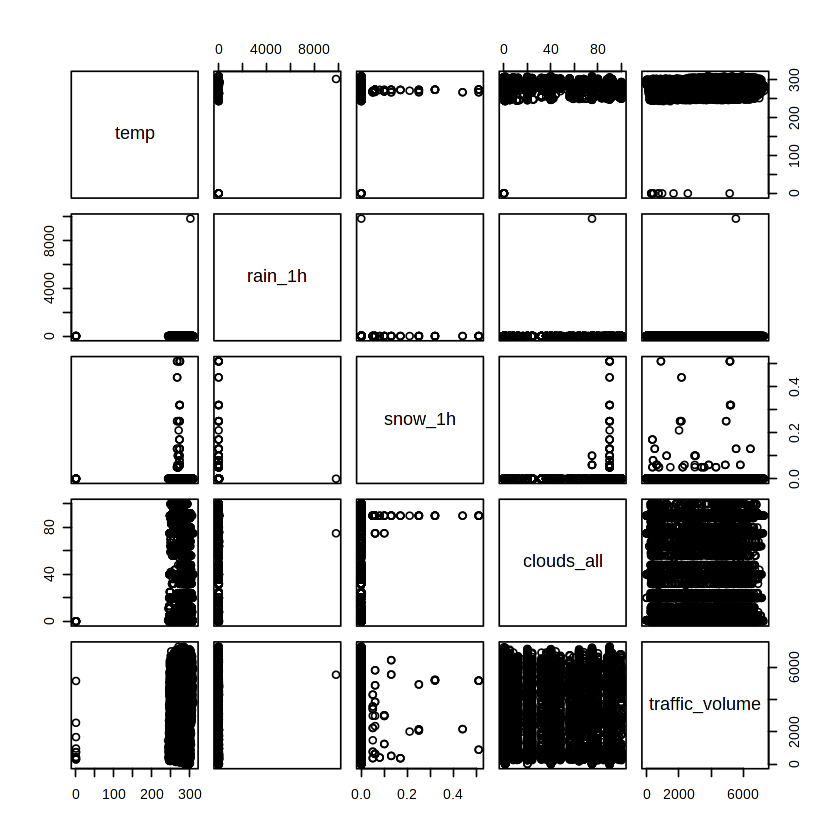

In [5]:
pairs(df[,c(2,3,4,5,9)])

In [6]:
options(repr.plot.width = 4, repr.plot.height = 4)

temp0,n
<dbl>,<int>
0,48194
1,10


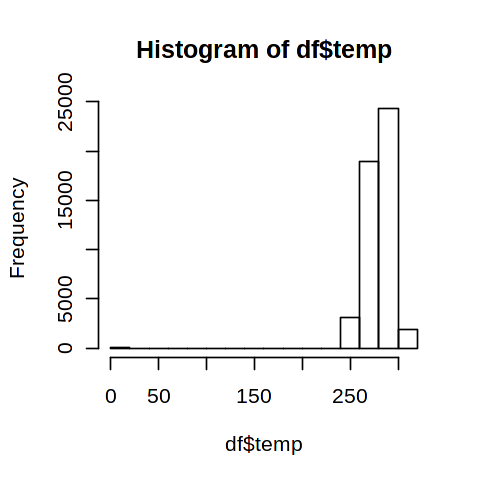

In [7]:
## temp == 0 ?
df %>% mutate(temp0 = ifelse(temp==0,1,0)) %>% group_by(temp0) %>% tally()
hist(df$temp)

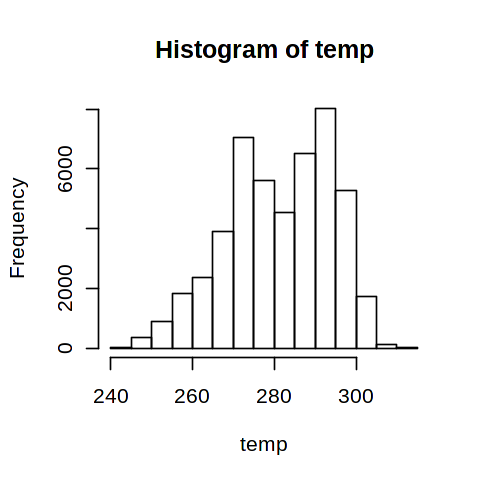

In [8]:
temp <- ifelse(df$temp==0,NA,df$temp)
hist(temp)

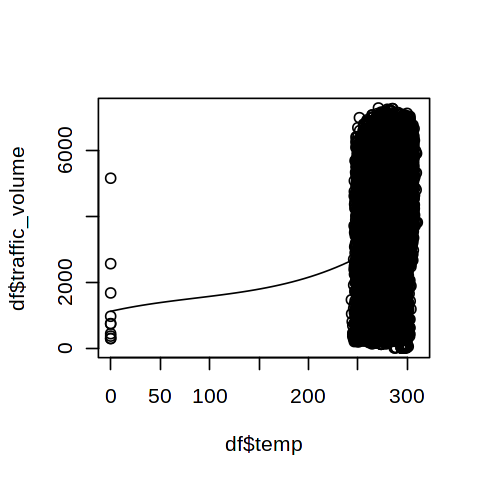

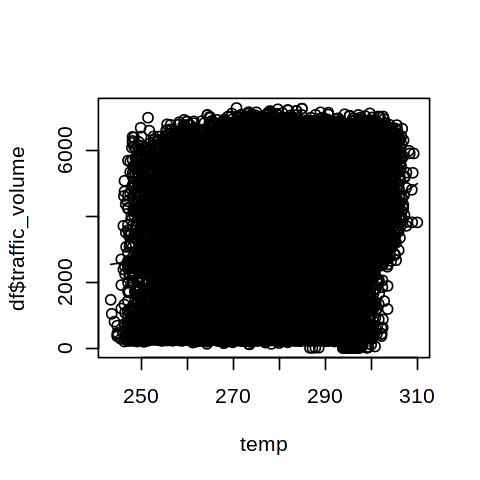

In [9]:
scatter.smooth(df$traffic_volume ~ df$temp)
scatter.smooth(df$traffic_volume ~ temp)


rainhi,n
<dbl>,<int>
0,48203
1,1


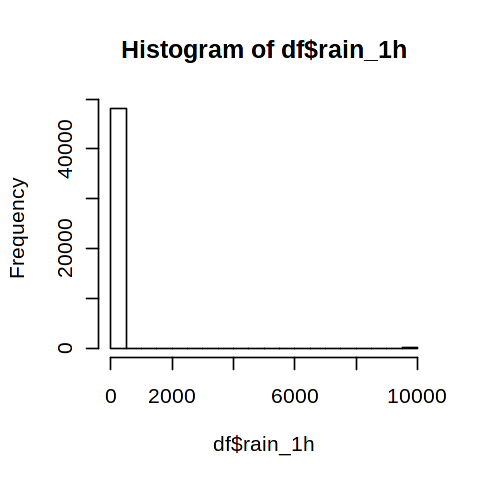

In [10]:
## rain_1h == 9831.300 ?
df %>% mutate(rainhi = ifelse(rain_1h>100,1,0)) %>% group_by(rainhi) %>% tally()
hist(df$rain_1h)

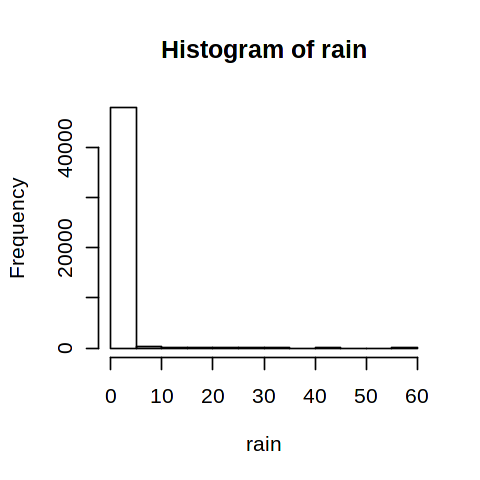

In [11]:
rain <- ifelse(df$rain_1h>100,NA,df$rain_1h)
hist(rain)

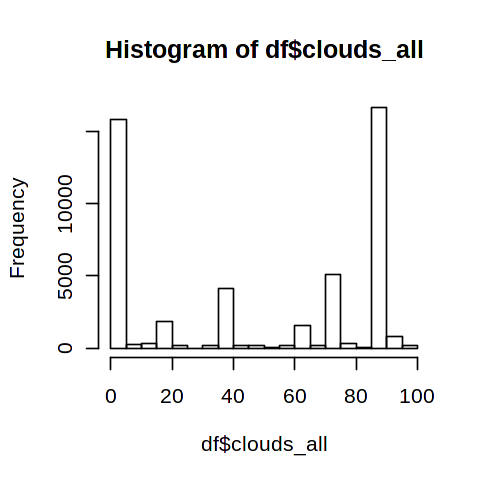

In [12]:
## clouds_all
hist(df$clouds_all)

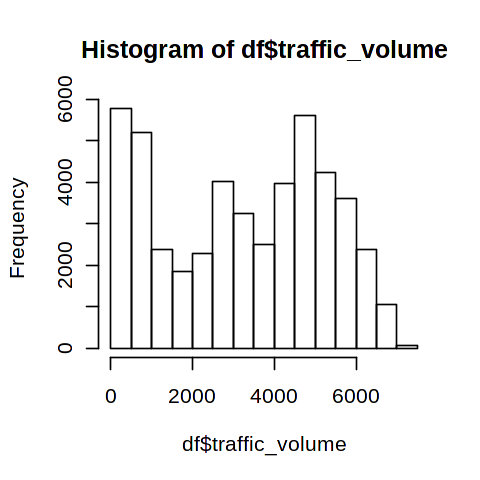

In [13]:
## traffic_volume
hist(df$traffic_volume)

In [14]:
str(df)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	48204 obs. of  9 variables:
 $ holiday            : chr  "None" "None" "None" "None" ...
 $ temp               : num  288 289 290 290 291 ...
 $ rain_1h            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ snow_1h            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ clouds_all         : num  40 75 90 90 75 1 1 1 20 20 ...
 $ weather_main       : chr  "Clouds" "Clouds" "Clouds" "Clouds" ...
 $ weather_description: chr  "scattered clouds" "broken clouds" "overcast clouds" "overcast clouds" ...
 $ date_time          : POSIXct, format: "2012-10-02 09:00:00" "2012-10-02 10:00:00" ...
 $ traffic_volume     : num  5545 4516 4767 5026 4918 ...
 - attr(*, "spec")=
  .. cols(
  ..   holiday = col_character(),
  ..   temp = col_double(),
  ..   rain_1h = col_double(),
  ..   snow_1h = col_double(),
  ..   clouds_all = col_double(),
  ..   weather_main = col_character(),
  ..   weather_description = col_character(),
  ..   date_time = col_datetime(format = 

In [15]:
library(lubridate)


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




In [16]:
df.tscnt <- df %>% group_by(year(date_time),month(date_time)) %>% tally()
head(df.tscnt)
tail(df.tscnt)

year(date_time),month(date_time),n
<dbl>,<dbl>,<int>
2012,10,805
2012,11,785
2012,12,969
2013,1,706
2013,2,717
2013,3,715


year(date_time),month(date_time),n
<dbl>,<dbl>,<int>
2018,4,902
2018,5,871
2018,6,874
2018,7,866
2018,8,946
2018,9,935


In [17]:
df.tscnt <- ts(df.tscnt[,3],start = c(2012,10), end = c(2018,9),frequency = 12)
df.tscnt

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2012,,,,,,,,,,805,785,969
2013,706,717,715,939,940,767,748,650,478,442,590,881
2014,787,675,738,680,778,387,658,136,186,857,860,828
2015,571,488,583,603,616,608,775,895,741,816,826,785
2016,727,979,935,1026,714,865,963,952,817,850,960,805
2017,928,844,881,884,804,867,902,871,874,866,946,935
2018,805,785,969,706,717,715,939,940,767,,,


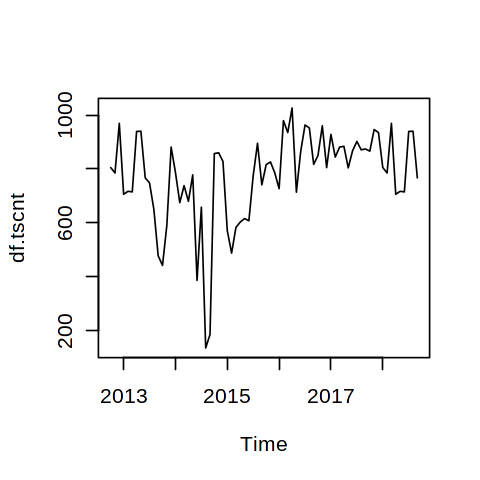

In [18]:
plot(df.tscnt)

In [19]:
## traffic as time series...
df.ts <- ts(df[,9], start = c(2012,10), end = c(2018,9),frequency = 12)
df.ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2012,,,,,,,,,,5545,4516,4767
2013,5026,4918,5181,5584,6015,5791,4770,3539,2784,2361,1529,963
2014,506,321,273,367,814,2718,5673,6511,5471,5097,4887,5337
2015,5692,6137,4623,3591,2898,2637,1777,1015,598,369,312,367
2016,835,2726,5689,6990,5985,5309,4603,4884,5104,5178,5501,5713
2017,6292,6057,4907,3503,3037,2822,1992,1166,627,388,368,2489
2018,5537,6628,5534,5403,4770,5217,5870,5967,6108,,,


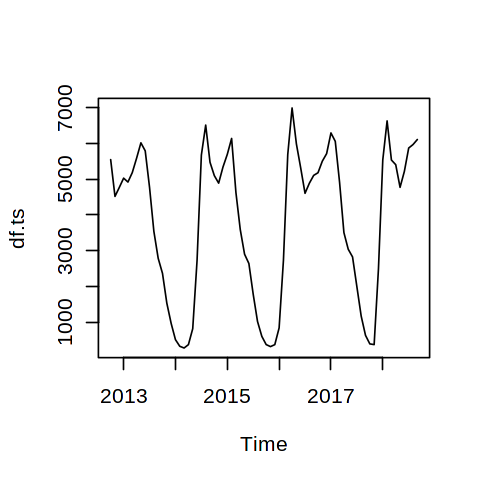

In [20]:
plot(df.ts)

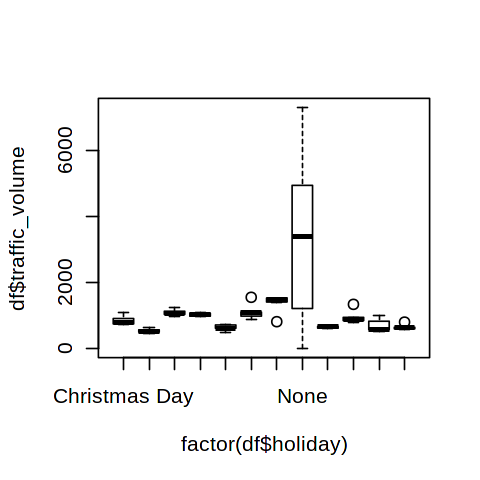

In [21]:
plot(df$traffic_volume ~ factor(df$holiday))

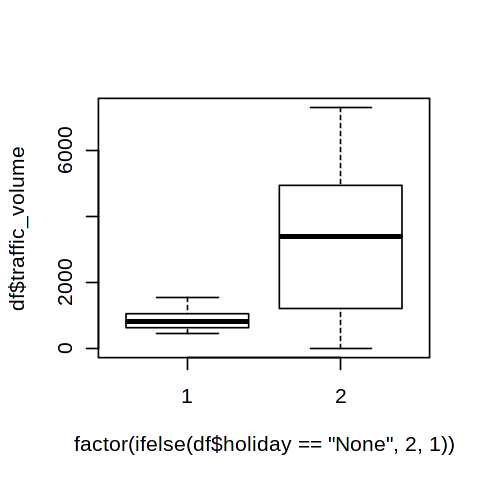

In [22]:
## holyday vs workday...
plot(df$traffic_volume ~ factor(ifelse(df$holiday=="None",2,1)))

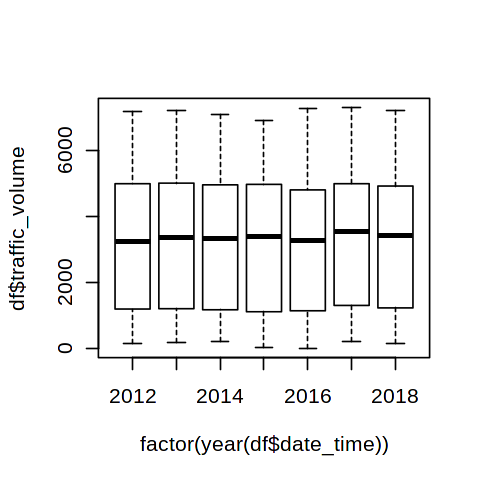

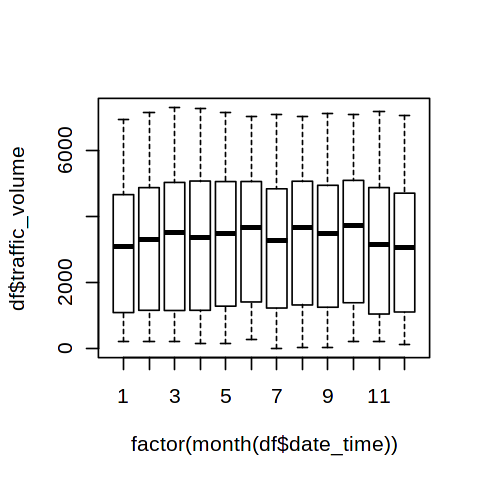

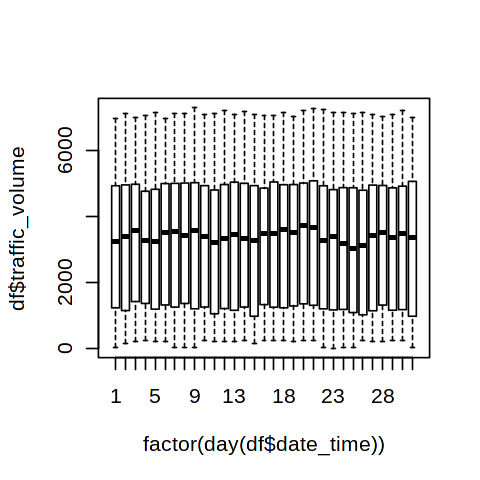

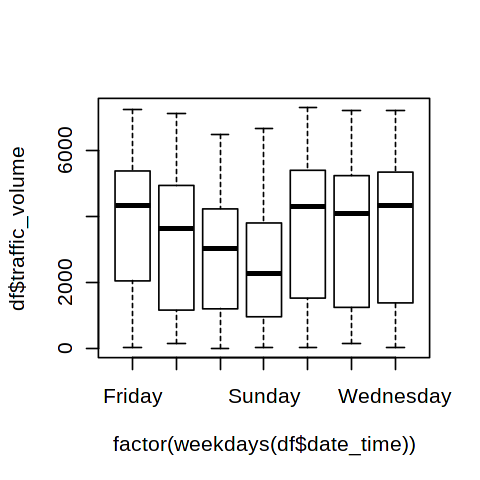

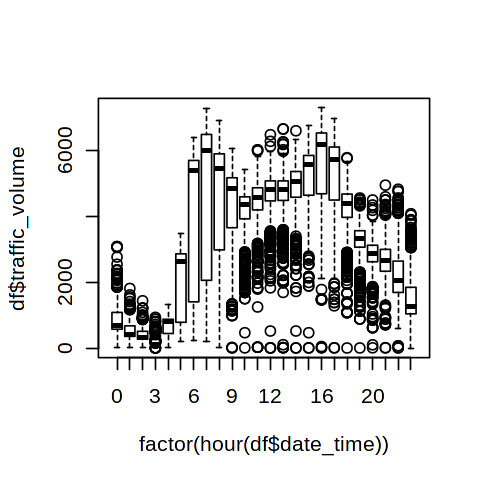

In [23]:
## traffic by parts of date...
plot(df$traffic_volume ~ factor(year(df$date_time)))
plot(df$traffic_volume ~ factor(month(df$date_time)))
plot(df$traffic_volume ~ factor(day(df$date_time)))
plot(df$traffic_volume ~ factor(weekdays(df$date_time)))
plot(df$traffic_volume ~ factor(hour(df$date_time)))


[1] "Clear"        "Clouds"       "Drizzle"      "Fog"          "Haze"        
 [6] "Mist"         "Rain"         "Smoke"        "Snow"         "Squall"      
[11] "Thunderstorm"

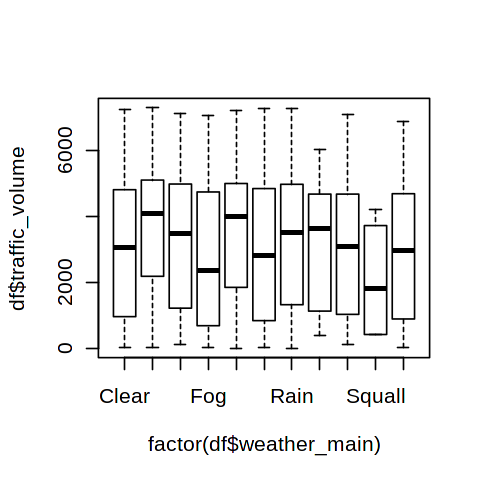

In [24]:
levels(factor(df$weather_main))
plot(df$traffic_volume ~ factor(df$weather_main))


[1] "broken clouds"                       "drizzle"                            
 [3] "few clouds"                          "fog"                                
 [5] "freezing rain"                       "haze"                               
 [7] "heavy intensity drizzle"             "heavy intensity rain"               
 [9] "heavy snow"                          "light intensity drizzle"            
[11] "light intensity shower rain"         "light rain"                         
[13] "light rain and snow"                 "light shower snow"                  
[15] "light snow"                          "mist"                               
[17] "moderate rain"                       "overcast clouds"                    
[19] "proximity shower rain"               "proximity thunderstorm"             
[21] "proximity thunderstorm with drizzle" "proximity thunderstorm with rain"   
[23] "scattered clouds"                    "shower drizzle"                     
[25] "shower snow"                         "sky is clear"                       
[27] "Sky is Clear"                        "sleet"                              
[29] "smoke"                               "snow"                               
[31] "SQUALLS"                             "thunderstorm"                       
[33] "thunderstorm with drizzle"           "thunderstorm with heavy rain"       
[35] "thunderstorm with light drizzle"     "thunderstorm with light rain"       
[37] "thunderstorm with rain"              "very heavy rain"

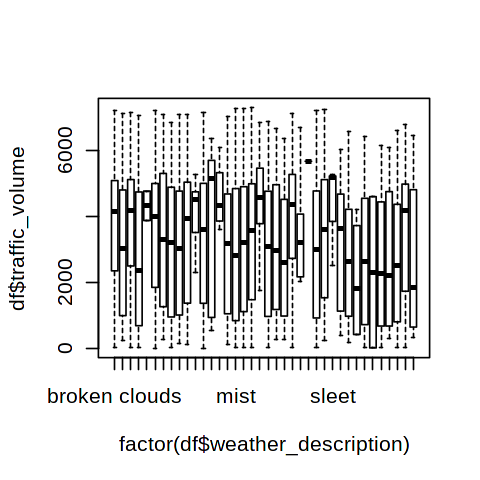

In [25]:
levels(factor(df$weather_description))
plot(df$traffic_volume ~ factor(df$weather_description))


# DATA TRANSFORMATIONS

In [26]:
df2 <- df

In [27]:
df2$temp <- ifelse(df2$temp==0,NA,df2$temp)
df2$rain_1h <- ifelse(df2$rain_1h>100,NA,df2$rain_1h)
df2$weather_main <- factor(df2$weather_main)
df2$weather_description <- factor(df2$weather_description)
df2$holiday <- factor(ifelse(df2$holiday=="None",0,1))
df2$month <- factor(month(df$date_time))
df2$day <- factor(day(df$date_time))
df2$hour <- factor(hour(df$date_time))
df2$weekday <- factor(weekdays(df$date_time))


In [28]:
ts.decomp <- decompose(df.ts)
ts.decomp

$x
      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
2012                                              5545 4516 4767
2013 5026 4918 5181 5584 6015 5791 4770 3539 2784 2361 1529  963
2014  506  321  273  367  814 2718 5673 6511 5471 5097 4887 5337
2015 5692 6137 4623 3591 2898 2637 1777 1015  598  369  312  367
2016  835 2726 5689 6990 5985 5309 4603 4884 5104 5178 5501 5713
2017 6292 6057 4907 3503 3037 2822 1992 1166  627  388  368 2489
2018 5537 6628 5534 5403 4770 5217 5870 5967 6108               

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
2012                                                                  
2013  280.21319  852.21319  635.67986  383.47153  203.81319  362.96319
2014  280.21319  852.21319  635.67986  383.47153  203.81319  362.96319
2015  280.21319  852.21319  635.67986  383.47153  203.81319  362.96319
2016  280.21319  852.21319  635.67986  383.47153  203.81319  362.96319
2017  280.21319  852.21319  635.67986  3

In [29]:
ts.decomp$seasonal[4:15]

[1]  280.21319  852.21319  635.67986  383.47153  203.81319  362.96319
 [7]  285.28819  -73.22014 -596.61181 -836.24514 -983.56181 -514.00347

In [30]:
seasons <- data.frame(month=factor(1:12),seasonal=ts.decomp$seasonal[4:15])
seasons

month,seasonal
<fct>,<dbl>
1,280.21319
2,852.21319
3,635.67986
4,383.47153
5,203.81319
6,362.96319
7,285.28819
8,-73.22014
9,-596.61181


In [31]:
df2 <- inner_join(df2,seasons)

Joining, by = "month"


In [32]:
## some keywords that are common in descriptions:
# heavy / light
# drizzle/ shower / rain
# sleet / snow
# clear / fog 
# thunderstorm
## we can make a one hot encoding for the precense of each...
df2$light_heavy <- 0
df2$light_heavy[grep("light",df$weather_description)] <- 1
df2$light_heavy[grep("heavy",df$weather_description)] <- 2
table(df2$light_heavy)


    0     1     2 
40459  6517  1228 

In [33]:
df2$rainy <- 0
df2$rainy[grep("drizzle",df$weather_description)] <- 1
df2$rainy[grep("shower",df$weather_description)] <- 2
df2$rainy[grep("rain",df$weather_description)] <- 3
table(df2$rainy)
df2$rainy <- factor(df2$rainy, levels=c(0,1,2,3),labels=c("None","drizzle","shower","rain"))


    0     1     2     3 
40457  1845    18  5884 

In [34]:
df2$clear <- 0
df2$clear[grep("clear",df$weather_description)] <- 1
df2$clear[grep("fog",df$weather_description)] <- 2
table(df2$clear)
df2$clear <- factor(df2$clear,levels=c(0,1,2),labels=c("None","clear","fog"))


    0     1     2 
35627 11665   912 

In [35]:
df2$thunderstorm <- 0
df2$thunderstorm[grep("thunderstorm",df$weather_description)] <- 1
table(df2$thunderstorm)
df2$thunderstorm <- factor(df2$thunderstorm, levels=c(0,1),labels=c("No","Yes"))


    0     1 
47170  1034 

In [36]:
summary(df2)

 holiday        temp          rain_1h           snow_1h         
 0:48143   Min.   :243.4   Min.   : 0.0000   Min.   :0.0000000  
 1:   61   1st Qu.:272.2   1st Qu.: 0.0000   1st Qu.:0.0000000  
           Median :282.5   Median : 0.0000   Median :0.0000000  
           Mean   :281.3   Mean   : 0.1303   Mean   :0.0002224  
           3rd Qu.:291.8   3rd Qu.: 0.0000   3rd Qu.:0.0000000  
           Max.   :310.1   Max.   :55.6300   Max.   :0.5100000  
           NA's   :10      NA's   :1                            
   clouds_all      weather_main         weather_description
 Min.   :  0.00   Clouds :15164   sky is clear    :11665   
 1st Qu.:  1.00   Clear  :13391   mist            : 5950   
 Median : 64.00   Mist   : 5950   overcast clouds : 5081   
 Mean   : 49.36   Rain   : 5672   broken clouds   : 4666   
 3rd Qu.: 90.00   Snow   : 2876   scattered clouds: 3461   
 Max.   :100.00   Drizzle: 1821   light rain      : 3372   
                  (Other): 3330   (Other)         :14009   


In [37]:
getMissingness(df2)

[[1]]
      var na_count rate
1    temp       10    0
2 rain_1h        1    0

[[2]]
[1] "This dataset has 48193 (100%) complete rows. Original data has 48204 rows."



var,na_count,rate
<fct>,<dbl>,<dbl>
temp,10,0
rain_1h,1,0


In [38]:
mm <- getMissingness(df2,getRows = T)

[[1]]
      var na_count rate
1    temp       10    0
2 rain_1h        1    0

[[2]]
[1] "This dataset has 48193 (100%) complete rows. Original data has 48204 rows."



In [39]:
df2 <- df2[mm$rows,]

In [40]:
df2 <- df2[,setdiff(names(df2),c("weather_description","date_time"))]

# DATASET PARTITION

In [41]:
train_test(data=df2,train_name="train",test_name="test",prop=0.7,seed=5,tableone=TRUE)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test



  |======================================================================| 100%

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

You got a perfectly balanced training and test datasets

 



V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,48193,33735,14458,NA
holiday,1,61 (0.1%),38 (0.1%),23 (0.2%),0.24
temp,Mean (SD),281.3 (12.7),281.3 (12.7),281.2 (12.7),NA
temp,Median (IQR),282.5 (272.2-291.8),282.6 (272.2-291.9),282.2 (272.1-291.8),0.233
rain_1h,Mean (SD),0.1 (1.0),0.1 (1.0),0.1 (1.0),NA
rain_1h,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.55
snow_1h,Mean (SD),0.0 (0.0),0.0 (0.0),0.0 (0.0),NA
snow_1h,Median (IQR),0.0 (0.0-0.0),0.0 (0.0-0.0),0.0 (0.0-0.0),0.573
clouds_all,Mean (SD),49.4 (39.0),49.4 (39.0),49.4 (39.1),NA


# MODELS

In [42]:
### The error we will use is the RMSE and RMSLE
rmse <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}


In [43]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
err_res <- NULL

## Linear Models

In [44]:
## model with only the original variables
mod1 <- lm(traffic_volume ~., data=train[,1:7])
summary(mod1)


Call:
lm(formula = traffic_volume ~ ., data = train[, 1:7])

Residuals:
    Min      1Q  Median      3Q     Max 
-4101.9 -1867.1   104.3  1611.0  4730.0 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -3314.4421   253.1290 -13.094  < 2e-16 ***
holiday1                 -2334.6834   315.3707  -7.403 1.36e-13 ***
temp                        22.6583     0.8956  25.300  < 2e-16 ***
rain_1h                    -37.1221    10.9872  -3.379 0.000729 ***
snow_1h                   1139.1762  1262.5646   0.902 0.366919    
clouds_all                   4.5472     0.4329  10.505  < 2e-16 ***
weather_mainClouds         283.0241    38.5860   7.335 2.27e-13 ***
weather_mainDrizzle       -204.9962    68.0215  -3.014 0.002583 ** 
weather_mainFog           -521.7774    81.5327  -6.400 1.58e-10 ***
weather_mainHaze           302.5139    70.2590   4.306 1.67e-05 ***
weather_mainMist          -403.4908    45.3671  -8.894  < 2e-16 ***
weather_mainRa

In [45]:
pred1 <- predict(mod1,newdata=test)
rmse(test$traffic_volume,pred1)
rmsle(test$traffic_volume,pred1)
err_res <- rbind(err_res, data.frame(Name="Base Linear regression", Model="mod1", 
                                     RMSE=rmse(test$traffic_volume,pred1), 
                                     RMSLE=rmsle(test$traffic_volume,pred1)))

[1] 1948.795

[1] 1.015269

In [46]:
## model with all the variables
mod2 <- lm(traffic_volume ~., data=train)
summary(mod2)


Call:
lm(formula = traffic_volume ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4626.5  -405.9    -6.4   494.7  3138.6 

Coefficients: (3 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -908.2994   206.4180  -4.400 1.08e-05 ***
holiday1                   -69.5882   133.3194  -0.522 0.601697    
temp                         7.2532     0.7617   9.523  < 2e-16 ***
rain_1h                    -29.7166     4.6348  -6.412 1.46e-10 ***
snow_1h                   -247.6374   528.8101  -0.468 0.639579    
clouds_all                  -1.2322     0.1847  -6.672 2.56e-11 ***
weather_mainClouds         101.2068    27.5163   3.678 0.000235 ***
weather_mainDrizzle        296.0703   162.7875   1.819 0.068958 .  
weather_mainFog              0.9673    40.9939   0.024 0.981176    
weather_mainHaze            16.9339    37.1187   0.456 0.648243    
weather_mainMist            26.5949    29.4604  

In [47]:
pred2 <- predict(mod2,newdata=test)
rmse(test$traffic_volume,pred2)
rmsle(test$traffic_volume,pred2)
err_res <- rbind(err_res, data.frame(Name="Extended Linear regression", Model="mod2", 
                                     RMSE=rmse(test$traffic_volume,pred2), 
                                     RMSLE=rmsle(test$traffic_volume,pred2)))

[1] 808.1246

[1] 0.5413018

## Desicion trees

In [48]:
library(tree)
library(rpart)

In [49]:
mod3 <- tree(traffic_volume ~., data=train)
mod3

node), split, n, deviance, yval
      * denotes terminal node

 1) root 33735 1.329e+11 3267.0  
   2) hour: 0,1,2,3,4,5,20,21,22,23 14126 1.554e+10 1402.0  
     4) hour: 0,1,2,3,4,23 8539 2.131e+09  715.3 *
     5) hour: 5,20,21,22 5587 3.238e+09 2450.0 *
   3) hour: 6,7,8,9,10,11,12,13,14,15,16,17,18,19 19609 3.280e+10 4610.0  
     6) weekday: Saturday,Sunday 5608 8.623e+09 3456.0  
      12) hour: 6,7,8 1257 6.240e+08 1655.0 *
      13) hour: 9,10,11,12,13,14,15,16,17,18,19 4351 2.741e+09 3976.0 *
     7) weekday: Friday,Monday,Thursday,Tuesday,Wednesday 14001 1.371e+10 5073.0  
      14) hour: 9,10,11,12,13,18,19 6929 3.648e+09 4480.0  
        28) hour: 19 960 1.720e+08 3287.0 *
        29) hour: 9,10,11,12,13,18 5969 1.889e+09 4672.0 *
      15) hour: 6,7,8,14,15,16,17 7072 5.243e+09 5653.0 *

In [50]:
pred3 <- predict(mod3,newdata=test)
rmse(test$traffic_volume,pred3)
rmsle(test$traffic_volume,pred3)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-tree", Model="mod3", 
                                     RMSE=rmse(test$traffic_volume,pred3), 
                                     RMSLE=rmsle(test$traffic_volume,pred3)))

[1] 694.3177

[1] 0.4478587

In [51]:
mod4 <- rpart(traffic_volume ~., data=train)
mod4

n= 33735 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 33735 132874800000 3266.6400  
   2) hour=0,1,2,3,4,5,20,21,22,23 14126  15535180000 1401.5070  
     4) hour=0,1,2,3,4,23 8539   2130731000  715.3044 *
     5) hour=5,20,21,22 5587   3238406000 2450.2770 *
   3) hour=6,7,8,9,10,11,12,13,14,15,16,17,18,19 19609  32799230000 4610.2500  
     6) weekday=Saturday,Sunday 5608   8622991000 3455.9990  
      12) hour=6,7,8 1257    623993000 1654.5530 *
      13) hour=9,10,11,12,13,14,15,16,17,18,19 4351   2741289000 3976.4350 *
     7) weekday=Friday,Monday,Thursday,Tuesday,Wednesday 14001  13712050000 5072.5780  
      14) hour=9,10,11,12,13,18,19 6929   3647609000 4479.7160  
        28) hour=19 960    171961000 3286.6820 *
        29) hour=9,10,11,12,13,18 5969   1889493000 4671.5930 *
      15) hour=6,7,8,14,15,16,17 7072   5242811000 5653.4510 *

In [52]:
pred4 <- predict(mod4,newdata=test)
rmse(test$traffic_volume,pred4)
rmsle(test$traffic_volume,pred4)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-rpart", Model="mod4", 
                                     RMSE=rmse(test$traffic_volume,pred4), 
                                     RMSLE=rmsle(test$traffic_volume,pred4)))

[1] 694.3177

[1] 0.4478587

## Random Forest

In [53]:
library(randomForest)
library(ranger)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance




In [54]:
#mod5 <- randomForest(traffic_volume ~., data=train)
#mod5

In [55]:
#pred5 <- predict(mod5,newdata=test)
#rmse(test$traffic_volume,pred5)
#rmsle(test$traffic_volume,pred5)

In [56]:
mod6 <- ranger(traffic_volume ~., data=train)
mod6

Ranger result

Call:
 ranger(traffic_volume ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      33735 
Number of independent variables:  15 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       337363.9 
R squared (OOB):                  0.9143507 

In [57]:
pred6 <- predict(mod6,data=test)
#head(pred6)
rmse(test$traffic_volume,pred6$predictions)
rmsle(test$traffic_volume,pred6$predictions)
err_res <- rbind(err_res, data.frame(Name="RandomForest (ranger)", Model="mod6", 
                                     RMSE=rmse(test$traffic_volume,pred6$predictions), 
                                     RMSLE=rmsle(test$traffic_volume,pred6$predictions)))

[1] 578.4987

[1] 0.3721806

## XGBoost

In [58]:
library(xgboost)

ERROR: Error in library(xgboost): there is no package called ‘xgboost’


In [ ]:
train1 <- Matrix::sparse.model.matrix(traffic_volume ~ .-1, data = train)

In [ ]:
test1 <- Matrix::sparse.model.matrix(traffic_volume ~ .-1, data = test)

In [ ]:
#X_train <- xgb.DMatrix(train1)
X_train <- train1
y_train <- train$traffic_volume
mod7 <- xgboost(data=X_train,label=y_train, nrounds=100,print_every_n = 10)

In [ ]:
#X_test <- xgb.DMatrix(test1)
X_test <- test1
y_test <- test$traffic_volume

pred7 <- predict(mod7,newdata=X_test)
rmse(y_test,pred7)
rmsle(y_test,pred7)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod7", 
                                     RMSE=rmse(test$traffic_volume,pred7), 
                                     RMSLE=rmsle(test$traffic_volume,pred7)))

## kNN 

In [ ]:
### adaboost needs that values to be normalized
min_max <- function(x) { (x -min(x))/(max(x)-min(x))   }

In [ ]:
X_train <- sapply(data.frame(as.matrix(train1)),min_max)

In [ ]:
X_test <- sapply(data.frame(as.matrix(test1)),min_max)

In [ ]:
summary(X_train)

In [ ]:
library(class)
mod8 <- knn(X_train,X_test,cl=train$traffic_volume)

In [ ]:
str(mod8)

In [ ]:
pred8 <- as.numeric(as.character(mod8))

rmse(test$traffic_volume,pred8)
rmsle(test$traffic_volume,pred8)
err_res <- rbind(err_res, data.frame(Name="kNN", Model="mod8", 
                                     RMSE=rmse(test$traffic_volume,pred8), 
                                     RMSLE=rmsle(test$traffic_volume,pred8)))

## SVM

In [ ]:
#install.packages("liquidSVM")
library(liquidSVM)

mod9 <- svm(traffic_volume ~., train)

In [ ]:
pred9 <- predict(mod9, newdata=test)

rmse(test$traffic_volume,pred9)
rmsle(test$traffic_volume,pred9)
err_res <- rbind(err_res, data.frame(Name="SVM", Model="mod9", 
                                     RMSE=rmse(test$traffic_volume,pred9), 
                                     RMSLE=rmsle(test$traffic_volume,pred9)))

In [ ]:
err_res %>% arrange(RMSLE)